In [1]:
!pip install pycaret==3.0.4  # 書籍執筆時点のバージョンをインストール


# 最新版をインストール場合はこちら
# !pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 6.2 MB/s

In [2]:
import pycaret

pycaret.__version__

'3.0.4'

# 使用するデータ


In [3]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


# データの準備

##エンコーディング

In [4]:
employee['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [5]:
employee['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [6]:
employee['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

### one-hotエンコーディング


In [7]:
from pycaret.classification import *


clf1 = setup(data=employee, target='left')

,Description,Value
0,Session id,6415
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [8]:
clf1.X_transformed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_sales,department_product_mng,department_technical,department_support,department_IT,department_hr,department_RandD,department_accounting,department_marketing,department_management,salary_low,salary_medium,salary_high
7351,0.19,0.61,3.0,272.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
980,0.45,0.45,2.0,140.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
299,0.74,0.84,5.0,249.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4772,0.58,0.98,3.0,146.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3022,0.82,0.63,4.0,232.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,0.40,0.45,2.0,140.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
542,0.77,0.91,5.0,236.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8372,0.36,0.56,6.0,242.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8908,0.40,0.73,4.0,146.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_sales,department_product_mng,department_technical,department_support,department_IT,department_hr,department_RandD,department_accounting,department_marketing,department_management,salary_low,salary_medium,salary_high
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Ordinal（序数）エンコーディング

In [10]:
# init setup
from pycaret.classification import *


clf2 = setup(data=employee, target='left',
             ordinal_features={'salary' : ['low', 'medium', 'high']},
             categorical_features=['department'])

,Description,Value
0,Session id,7312
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 19)"
5,Transformed train set shape,"(10499, 19)"
6,Transformed test set shape,"(4500, 19)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,1


In [11]:
clf2.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_product_mng,department_sales,department_IT,department_technical,department_marketing,department_support,department_accounting,department_hr,department_RandD,department_management,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### カテゴリ数が多い場合のエンコーディング

In [12]:
from pycaret.classification import *

# init setup with custom encoding settings
clf3 = setup(data=employee, target='left', max_encoding_ohe=3)
clf3.X_transformed.sort_index()

,Description,Value
0,Session id,4594
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 12)"
5,Transformed train set shape,"(10499, 12)"
6,Transformed test set shape,"(4500, 12)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary_medium,salary_low,salary_high
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.243346,0.0,1.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.243346,1.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.243346,1.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.243346,0.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.243346,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.256525,0.0,1.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.256525,0.0,1.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.256525,0.0,1.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.256525,0.0,1.0,0.0


In [13]:
clf3.pipeline

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['satisfaction_level',
                                             'last_evaluation',
                                             'number_project',
                                             'average_montly_hours',
                                             'time_spend_company',
                                             'Work_accident',
                                             'promotion_last_5years'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features...
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('rest_encoding',
                 TransformerWrapper(exclude=None, include=['department'],
                                    transformer=TargetEncoder(cols=['department'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0)))],
         verbose=False)

##データ型の指定

In [14]:
from pycaret.datasets import get_data
from pycaret.classification import *


employee = get_data('employee')

clf1 = setup(data=employee, target='left', categorical_features=['time_spend_company'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,8079
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 17)"
5,Transformed train set shape,"(10499, 17)"
6,Transformed test set shape,"(4500, 17)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [15]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_3.0,time_spend_company_2.0,time_spend_company_5.0,time_spend_company_6.0,time_spend_company_4.0,time_spend_company_7.0,time_spend_company_8.0,time_spend_company_10.0,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14995,0.37,0.48,2.0,160.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14996,0.37,0.53,2.0,143.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14997,0.11,0.96,6.0,280.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,support,low


In [16]:
clf2 = setup(data=employee, target ='left', ignore_features=['department', 'salary'])
clf2.X_transformed.sort_index()

,Description,Value
0,Session id,4657
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 8)"
5,Transformed train set shape,"(10499, 8)"
6,Transformed test set shape,"(4500, 8)"
7,Ignore features,2
8,Numeric features,7
9,Preprocess,True


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0


In [17]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_3.0,time_spend_company_2.0,time_spend_company_5.0,time_spend_company_6.0,time_spend_company_4.0,time_spend_company_7.0,time_spend_company_8.0,time_spend_company_10.0,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14995,0.37,0.48,2.0,160.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14996,0.37,0.53,2.0,143.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,support,low
14997,0.11,0.96,6.0,280.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,support,low


## 欠損値置換

In [18]:
import numpy as np
from pycaret.datasets import get_data


employee = get_data('employee')

employee['satisfaction_level'][1] = np.nan  # 欠損値の代入
employee['satisfaction_level'][3] = np.nan  # 欠損値の代入

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [19]:
employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,NaN,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,NaN,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [20]:
# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left')

,Description,Value
0,Session id,4035
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Rows with missing values,0.0%


In [21]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_support,department_sales,department_technical,department_IT,department_marketing,department_management,department_hr,department_RandD,department_product_mng,department_accounting,salary_medium,salary_low,salary_high
0,0.380000,0.53,2.0,157.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.612241,0.86,5.0,262.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.110000,0.88,7.0,272.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.612241,0.87,5.0,223.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.370000,0.52,2.0,159.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.400000,0.57,2.0,151.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.370000,0.48,2.0,160.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.370000,0.53,2.0,143.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.110000,0.96,6.0,280.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
clf2 = setup(data=employee, target='left', numeric_imputation='median')
clf2.X_transformed.sort_index()

,Description,Value
0,Session id,8269
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Rows with missing values,0.0%


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_sales,department_technical,department_product_mng,department_IT,department_management,department_marketing,department_accounting,department_hr,department_support,department_RandD,salary_medium,salary_low,salary_high
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.64,0.86,5.0,262.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.64,0.87,5.0,223.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
clf2.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_sales,department_technical,department_product_mng,department_IT,department_management,department_marketing,department_accounting,department_hr,department_support,department_RandD,salary_medium,salary_low,salary_high
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.64,0.86,5.0,262.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.64,0.87,5.0,223.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## 不均衡データ

In [24]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', fix_imbalance=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,5739
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(20498, 21)"
5,Transformed train set shape,"(15998, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [25]:
employee['left'].value_counts()


0    11428
1     3571
Name: left, dtype: int64

In [26]:
clf1.y_transformed.value_counts()


0    11428
1     9070
Name: left, dtype: int64

# スケーリング

In [27]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee,
             target='left', normalize=True, normalize_method='zscore')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,5379
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [28]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_sales,department_technical,department_management,department_marketing,department_support,department_RandD,department_hr,department_accounting,department_product_mng,salary_high,salary_low,salary_medium
0,-0.934135,-1.089142,-1.477117,-0.887431,-0.346209,-0.409382,-0.150322,-0.297941,1.622613,-0.467792,-0.211122,-0.244669,-0.421362,-0.232402,-0.226886,-0.237144,-0.253298,-0.301339,1.024005,-0.866098
1,0.746785,0.834297,0.958097,1.210501,1.726111,-0.409382,-0.150322,-0.297941,1.622613,-0.467792,-0.211122,-0.244669,-0.421362,-0.232402,-0.226886,-0.237144,-0.253298,-0.301339,-0.976558,1.154604
2,-2.014727,0.950869,2.581572,1.410304,0.344564,-0.409382,-0.150322,-0.297941,1.622613,-0.467792,-0.211122,-0.244669,-0.421362,-0.232402,-0.226886,-0.237144,-0.253298,-0.301339,-0.976558,1.154604
3,0.426609,0.892583,0.958097,0.431269,1.035338,-0.409382,-0.150322,-0.297941,1.622613,-0.467792,-0.211122,-0.244669,-0.421362,-0.232402,-0.226886,-0.237144,-0.253298,-0.301339,1.024005,-0.866098
4,-0.974157,-1.147428,-1.477117,-0.847470,-0.346209,-0.409382,-0.150322,-0.297941,1.622613,-0.467792,-0.211122,-0.244669,-0.421362,-0.232402,-0.226886,-0.237144,-0.253298,-0.301339,1.024005,-0.866098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.854091,-0.855998,-1.477117,-1.007312,-0.346209,-0.409382,-0.150322,-0.297941,-0.616290,-0.467792,-0.211122,-0.244669,2.373256,-0.232402,-0.226886,-0.237144,-0.253298,-0.301339,1.024005,-0.866098
14995,-0.974157,-1.380572,-1.477117,-0.827490,-0.346209,-0.409382,-0.150322,-0.297941,-0.616290,-0.467792,-0.211122,-0.244669,2.373256,-0.232402,-0.226886,-0.237144,-0.253298,-0.301339,1.024005,-0.866098
14996,-0.974157,-1.089142,-1.477117,-1.167155,-0.346209,-0.409382,-0.150322,-0.297941,-0.616290,-0.467792,-0.211122,-0.244669,2.373256,-0.232402,-0.226886,-0.237144,-0.253298,-0.301339,1.024005,-0.866098
14997,-2.014727,1.417157,1.769835,1.570146,0.344564,-0.409382,-0.150322,-0.297941,-0.616290,-0.467792,-0.211122,-0.244669,2.373256,-0.232402,-0.226886,-0.237144,-0.253298,-0.301339,1.024005,-0.866098


<Axes: >

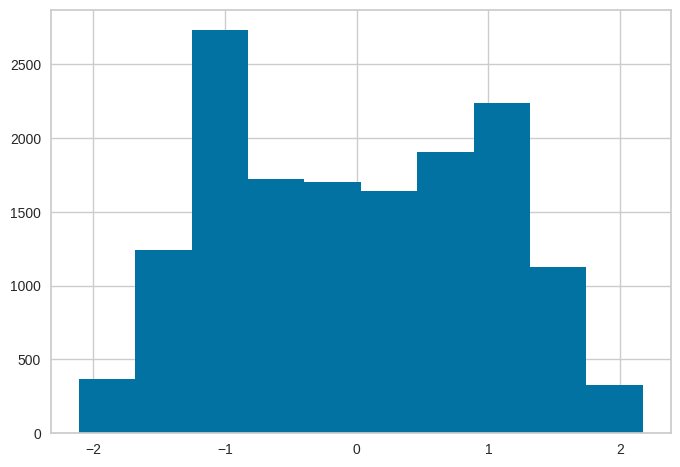

In [29]:
clf1.X_transformed['average_montly_hours'].hist()

## ターゲット変数変換

In [30]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.regression import *


reg1 = setup(data=employee, target='average_montly_hours', transform_target=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,1907
1,Target,average_montly_hours
2,Target type,Regression
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [31]:
reg1.y_transformed.sort_index()

0        42.291584
1        59.997644
2        61.546114
3        53.759517
4        42.660197
           ...    
14994    41.176279
14995    42.843926
14996    39.666058
14997    62.771300
14998    42.476084
Name: average_montly_hours, Length: 14999, dtype: float64

<Axes: >

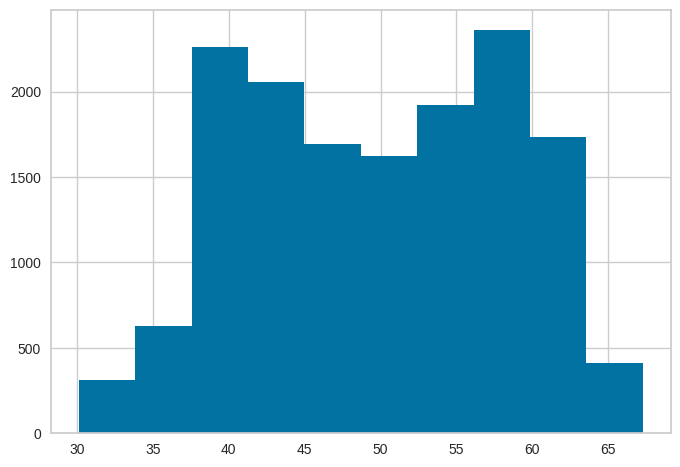

In [32]:
reg1.y_transformed.hist()

# 特徴量エンジニアリング

## 多項式特徴量

In [33]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', polynomial_features=True, polynomial_degree=2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,3015
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 231)"
5,Transformed train set shape,"(10499, 231)"
6,Transformed test set shape,"(4500, 231)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [34]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_support,department_product_mng,department_RandD,...,department_accounting^2,department_accounting salary_low,department_accounting salary_medium,department_accounting salary_high,salary_low^2,salary_low salary_medium,salary_low salary_high,salary_medium^2,salary_medium salary_high,salary_high^2
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Group特徴量

In [35]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', group_features=['satisfaction_level', 'last_evaluation'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,3733
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 27)"
5,Transformed train set shape,"(10499, 27)"
6,Transformed test set shape,"(4500, 27)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [36]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_sales,department_technical,department_hr,...,department_support,salary_low,salary_medium,salary_high,min(group_1),max(group_1),mean(group_1),std(group_1),median(group_1),mode(group_1)
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.38,0.53,0.455,0.075,0.455,0.38
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.80,0.86,0.830,0.030,0.830,0.80
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.11,0.88,0.495,0.385,0.495,0.11
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.72,0.87,0.795,0.075,0.795,0.72
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.37,0.52,0.445,0.075,0.445,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.40,0.57,0.485,0.085,0.485,0.40
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.37,0.48,0.425,0.055,0.425,0.37
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.37,0.53,0.450,0.080,0.450,0.37
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.11,0.96,0.535,0.425,0.535,0.11


## binning

In [37]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', bin_numeric_features=['average_montly_hours'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,5367
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [38]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_IT,department_support,department_sales,department_marketing,department_accounting,department_technical,department_hr,department_management,department_product_mng,salary_medium,salary_low,salary_high
0,0.38,0.53,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
employee['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

<Axes: >

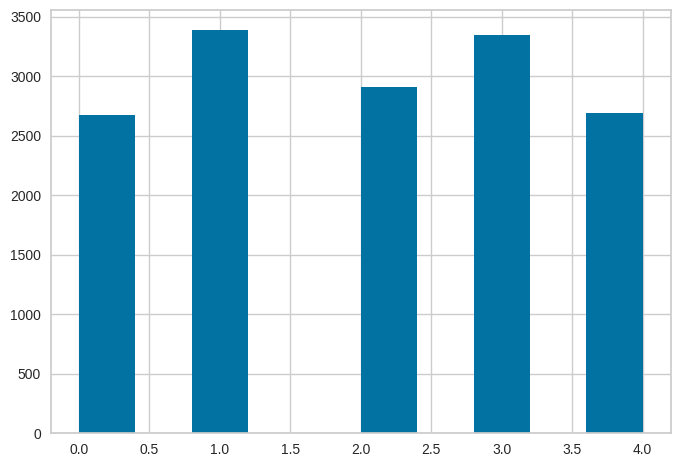

In [40]:
clf1.X_transformed['average_montly_hours'].hist()

## combine rare level

In [41]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.classification import *


clf1 = setup(data=employee, target='left', rare_to_value=0.1, rare_value='other')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,2262
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 15)"
5,Transformed train set shape,"(10499, 15)"
6,Transformed test set shape,"(4500, 15)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [42]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_other,department_technical,department_sales,department_support,salary_low,salary_other,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [43]:
employee['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# 特徴量選択

## 特徴量選択

In [44]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.regression import *


clf1 = setup(data=employee, target='left')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,8053
1,Target,left
2,Target type,Regression
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [45]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_sales,department_product_mng,department_technical,department_RandD,department_management,department_IT,department_support,department_accounting,department_marketing,department_hr,salary_low,salary_medium,salary_high
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
clf2 = setup(data=employee, target='left', feature_selection=True, n_features_to_select=0.9)

clf2.X_transformed.sort_index()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 10499, number of used features: 20
[LightGBM] [Info] Start training from score 0.235451


,Description,Value
0,Session id,3458
1,Target,left
2,Target type,Regression
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 9)"
5,Transformed train set shape,"(10499, 9)"
6,Transformed test set shape,"(4500, 9)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,department_technical,salary_low
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,1.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,1.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,1.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,1.0


## 多重共線性

In [47]:
# load dataset
from pycaret.datasets import get_data


employee = get_data('employee')

# init setup
from pycaret.regression import *


clf1 = setup(data=employee, target='left',
             remove_multicollinearity=True, multicollinearity_threshold=0.4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,Description,Value
0,Session id,1932
1,Target,left
2,Target type,Regression
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 20)"
5,Transformed train set shape,"(10499, 20)"
6,Transformed test set shape,"(4500, 20)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [48]:
clf1.X_transformed.sort_index()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_technical,department_hr,department_sales,department_product_mng,department_marketing,department_IT,department_management,department_RandD,department_support,department_accounting,salary_low,salary_medium,salary_high
0,0.38,0.53,157.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,262.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.11,0.88,272.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.72,0.87,223.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,159.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14995,0.37,0.48,160.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14996,0.37,0.53,143.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14997,0.11,0.96,280.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## 主成分分析

In [49]:
# load dataset
from pycaret.datasets import get_data


income = get_data('income')

# init setup
from pycaret.classification import *


clf1 = setup(data=income, target='income >50K', pca=True, pca_components=10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


,Description,Value
0,Session id,485
1,Target,income >50K
2,Target type,Binary
3,Original data shape,"(32561, 14)"
4,Transformed data shape,"(32561, 11)"
5,Transformed train set shape,"(22792, 11)"
6,Transformed test set shape,"(9769, 11)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,8


## 分散の低い特徴量の削除

In [50]:
# load dataset
from pycaret.datasets import get_data


mice = get_data('mice')
# filter dataset
mice = mice[mice['Genotype'] == 'Control']

# init setup
from pycaret.classification import *


clf1 = setup(data=mice, target='class', low_variance_threshold=0.1)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


,Description,Value
0,Session id,2037
1,Target,class
2,Target type,Multiclass
3,Target mapping,"c-CS-m: 0, c-CS-s: 1, c-SC-m: 2, c-SC-s: 3"
4,Original data shape,"(570, 82)"
5,Transformed data shape,"(570, 14)"
6,Transformed train set shape,"(399, 14)"
7,Transformed test set shape,"(171, 14)"
8,Ordinal features,2
9,Numeric features,77
